In [1]:
import numpy as np
import scipy.stats as ss
import elfi
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.examples import clinic
from pyabc.plots import plot_marginals, plot_particles
%matplotlib notebook

In [2]:
simulator = clinic.simulator

# Set the generating parameters that we will try to infer
lambda0 = 1/10

# Generate some dat9 (using a fixed seed here)
np.random.seed(1228)
y0 = simulator(lambda0)
print(y0)

closing_time, nr_patients, nr_waiting_patients = clinic.summaries

# prior over rate parameter
rate = pyabc.Prior('uniform', 0.01,1.5, name='rate')
rate.name

[[49], array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.42344354,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   4.51585521,   0.        ,
         4.34929369,   5.33611555,   4.79045358,  11.19269357,
        10.47966238,   6.52416327,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   5.97595535,   8.83547883,
         0.        ,   0.        ,   0.        ,   0.29101362,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ]), [964.8378133280579]]


'rate'

In [3]:
domain = [(0.01, 1.5)]
bolfi = pyabc.BOLFI(priors=[rate], simulator=simulator, 
                             summaries=[closing_time, nr_patients, nr_waiting_patients],
                             observation=y0,
                   domain=domain)

In [ ]:
bolfi.sample(nr_samples=1000, threshold=0.01, n_chains=10)

BOLFI sampler started with threshold: 0.01 and number of samples: 1000
Starting Bayesian Optimization


<IPython.core.display.Javascript object>


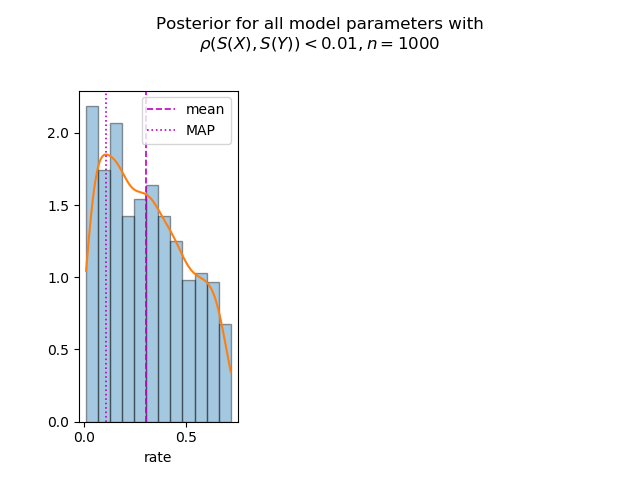

In [5]:
plot_marginals(bolfi, normed=True)

<IPython.core.display.Javascript object>


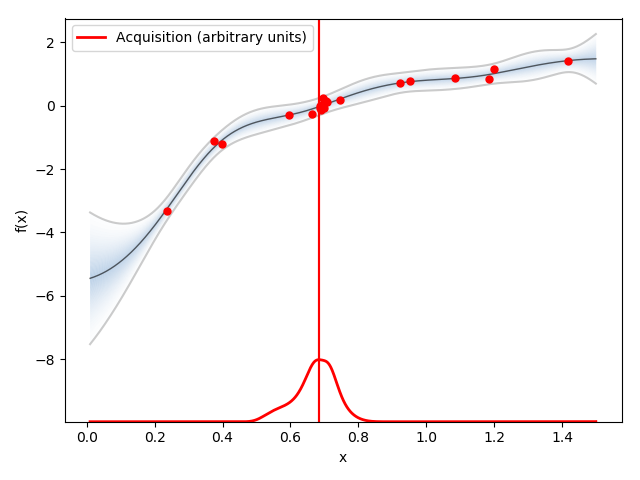

In [6]:
bolfi.bolfi.plot_acquisition()